## Observations and Insights 

In [1]:
#%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os as OS

# Study data files
mouse_metadata_path = OS.path.join('data','Mouse_metadata.csv')
study_results_path = OS.path.join('data','Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID','Mouse ID'])

# Display the data table for preview
merged_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(['Mouse ID','Timepoint'])
cleaned_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].count()

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_series = merged_df['Drug Regimen'].drop_duplicates().sort_values(ascending=True)

mean_series = pd.Series(index=drug_regimen_series, data=[(merged_df[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].mean()) for x in drug_regimen_series])
median_series = pd.Series(index=drug_regimen_series, data=[(merged_df[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].median()) for x in drug_regimen_series])
var_series = pd.Series(index=drug_regimen_series, data=[(merged_df[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].var()) for x in drug_regimen_series])
std_series = pd.Series(index=drug_regimen_series, data=[(merged_df[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].std()) for x in drug_regimen_series])
sem_series = pd.Series(index=drug_regimen_series, data=[(merged_df[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)'].sem()) for x in drug_regimen_series])

stat_series_list = [mean_series, median_series, var_series, std_series, sem_series]
stat_index_list = ['mean','median','variance','standard deviation','standard error of the mean']

drug_regimen_stat_df = pd.DataFrame(stat_series_list, index=stat_index_list)
drug_regimen_stat_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
standard deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
standard error of the mean,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_regimen_stat_df2 = cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

drug_regimen_stat_df2 = drug_regimen_stat_df2.rename(columns={'var':'variance','std':'standard deviation','sem':'standard error of the mean'})
drug_regimen_stat_df2.columns = drug_regimen_stat_df2.columns.droplevel()
drug_regimen_stat_df2.index.name = None
drug_regimen_stat_df2.T

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479
variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
standard deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
standard error of the mean,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398


## Bar and Pie Charts

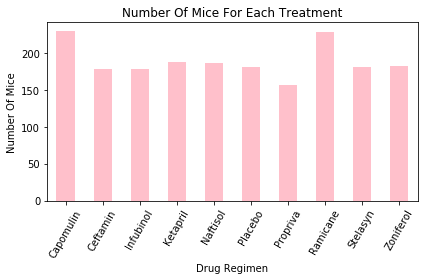

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

mice_count = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()

color = 'pink'

pd_plot = pd.DataFrame(mice_count).plot.bar(title='Number Of Mice For Each Treatment'
                                            ,color=color
                                            ,rot=60
                                            ,legend=False)
pd_plot.set_ylabel('Number Of Mice')
pd_plot.figure.tight_layout();

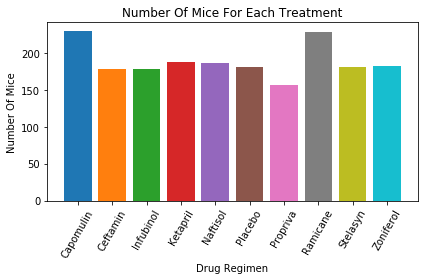

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt2 = plt
plt2.subplots()
plt2.bar(mice_count.index,mice_count.values, color=color)
plt2.title('Number Of Mice For Each Treatment')
plt2.ylabel('Number Of Mice')
plt2.xlabel('Drug Regimen')
plt2.xticks(rotation=60)
plt2.tight_layout()
plt2;

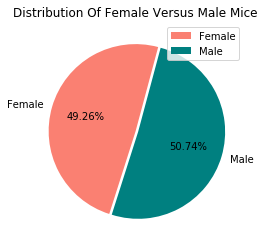

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_count = cleaned_df.groupby('Sex')['Mouse ID'].count()

color=['salmon','teal']

pd_plot2 =pd.DataFrame(mice_sex_count).plot.pie(y='Mouse ID'
                                                , title='Distribution Of Female Versus Male Mice'
                                                , autopct="%.2f%%"
                                                , colors=color
                                                , explode=(0,0.03)
                                                , startangle=75)
pd_plot2.set_ylabel('');

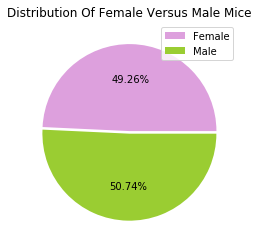

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label = [x for x in mice_sex_count.index]
color = ['plum','yellowgreen']

plt4 = plt
plt4.subplots()
plt4.pie(mice_sex_count, colors=color, explode=(0,0.03), autopct='%1.2f%%')
plt4.title('Distribution Of Female Versus Male Mice')
plt4.legend(label)
plt4;

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sample_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drop_drug_list = [x for x in drug_regimen_series if x not in sample_drug_list]

# Start by getting the last (greatest) timepoint for each mouse

mice_four_drug_df = cleaned_df.sort_values('Timepoint', ascending=False)

mice_four_drug_df = mice_four_drug_df.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].agg({'first'})
mice_four_drug_df = mice_four_drug_df.drop(index=drop_drug_list)
mice_four_drug_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(cleaned_df, mice_four_drug_df, how='inner', on=['Mouse ID','Drug Regimen'])
final_tumor_df = final_tumor_df.rename(columns={'first':'Final Tumor Volume'})
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878
...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,28.430964
810,m601,30,31.758275,1,Capomulin,Male,22,17,28.430964
811,m601,35,30.834357,1,Capomulin,Male,22,17,28.430964
812,m601,40,31.378045,1,Capomulin,Male,22,17,28.430964


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
